In [1]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
from faker import Faker
import random

In [2]:
# Initialize Faker
fake = Faker()

# Function to generate customer data
def generate_customer_data(num_customers):
    customer_data = []
    
    for _ in range(num_customers):
        customer = {
            'CustomerID': fake.unique.random_int(min=1000, max=9999),
            'Name': fake.name(),
            'Age': random.randint(18, 70),
            'Email': fake.email(),
            'AnnualIncome': round(random.uniform(30000, 120000), 2),
            'SpendingScore': random.randint(1, 100)
        }
        customer_data.append(customer)
    
    return pd.DataFrame(customer_data)

# Generate 500 customer records
df_customers = generate_customer_data(1500)

# Save to CSV
df_customers.to_csv('customers.csv', index=False)

# Display first few rows
print(df_customers.head())

   CustomerID              Name  Age                     Email  AnnualIncome  \
0        8778  Stephanie Newton   24  thomasdaniel@example.org     112303.27   
1        7427         Ian Combs   60    marylarson@example.com      37684.00   
2        4534    Jeffrey Foster   41     william77@example.com      71334.07   
3        5048      Dwayne Sharp   26       enelson@example.net      99072.38   
4        3168         Wayne May   30        lisa82@example.com      88553.94   

   SpendingScore  
0             53  
1             67  
2             87  
3            100  
4             17  


In [3]:
# Example connection to an SQLite sales database
engine = create_engine('sqlite:///customer.db')
connection = engine.connect()

        CustomerID          Age   AnnualIncome  SpendingScore
count  1500.000000  1500.000000    1500.000000    1500.000000
mean   5468.660667    44.285333   73940.424933      49.909333
std    2609.902549    15.339126   26225.249634      28.656248
min    1005.000000    18.000000   30051.950000       1.000000
25%    3248.250000    31.000000   50502.535000      26.000000
50%    5499.500000    44.000000   74141.645000      49.000000
75%    7678.250000    58.000000   96676.107500      75.000000
max    9998.000000    70.000000  119989.240000     100.000000


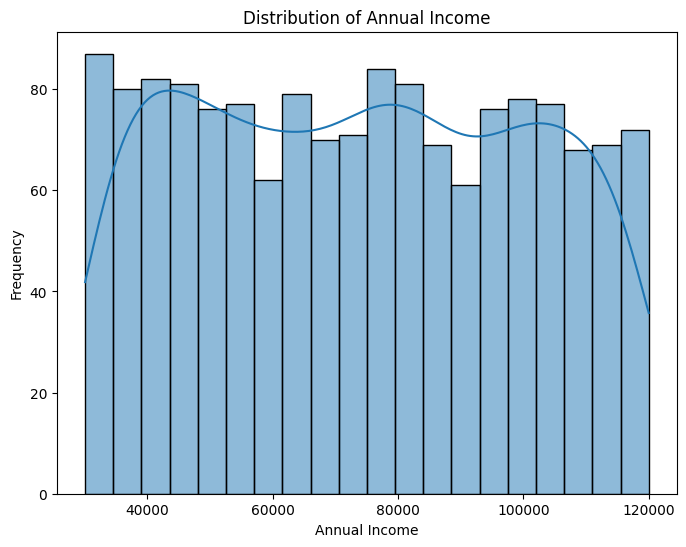

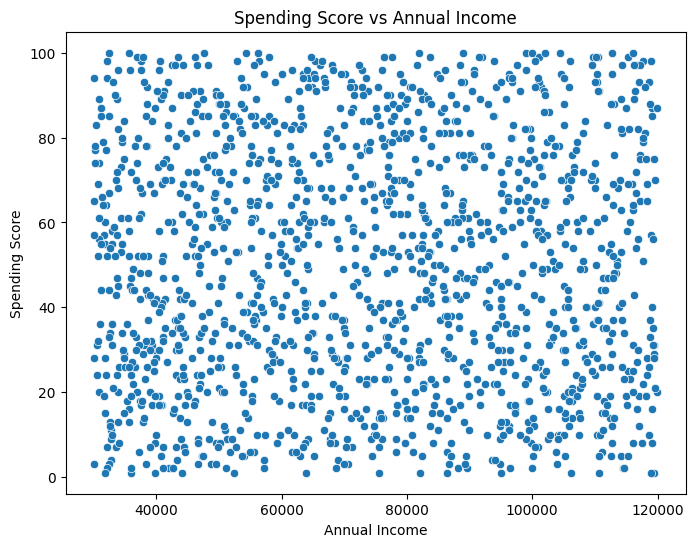

In [4]:
# Check the basic statistics of the dataset
print(df_customers.describe())

# Histogram of Annual Income
plt.figure(figsize=(8, 6))
sns.histplot(df_customers['AnnualIncome'], bins=20, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Scatter plot for Spending Score vs Annual Income
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', data=df_customers)
plt.title('Spending Score vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()